In [138]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import tree , metrics, preprocessing
from sklearn.metrics import confusion_matrix as cm
import os
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [139]:
os.chdir('D:\Analytics Vidhya\project\HR\HR DATA FINAL')

In [140]:
os.listdir()

['test_2umaH9m (1).csv', 'train_LZdllcl.csv']

In [141]:
train=pd.read_csv('train_LZdllcl.csv')
test=pd.read_csv('test_2umaH9m (1).csv')

In [142]:
train.shape

(54808, 14)

In [143]:
test.shape

(23490, 13)

In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [145]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [146]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [147]:
train=train.drop_duplicates()

In [148]:
test=test.drop_duplicates()

In [149]:
train["previous_year_rating"]=train["previous_year_rating"].fillna(0)

In [150]:
test["previous_year_rating"]=test["previous_year_rating"].fillna(0)

In [151]:
train.previous_year_rating.isnull().any()

False

In [152]:
train.department.value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [153]:
train.age.value_counts()

30    3665
31    3534
32    3534
29    3405
33    3210
28    3147
34    3076
27    2827
35    2711
36    2517
37    2165
26    2060
38    1923
39    1695
40    1663
25    1299
41    1289
42    1149
43     992
44     847
24     845
45     760
46     697
47     557
48     557
50     521
49     441
23     428
51     389
53     364
52     351
54     313
55     294
56     264
57     238
22     231
60     217
58     213
59     209
20     113
21      98
Name: age, dtype: int64

In [154]:
train['department'] = train['department'].apply(lambda x : str(x).replace('Sales & Marketing', '0'))
train['department'] = train['department'].apply(lambda x : str(x).replace('Operations', '1'))
train['department'] = train['department'].apply(lambda x : str(x).replace('Procurement', '2'))
train['department'] = train['department'].apply(lambda x : str(x).replace('Technology', '3'))
train['department'] = train['department'].apply(lambda x : str(x).replace('Analytics', '4'))
train['department'] = train['department'].apply(lambda x : str(x).replace('Finance', '5'))
train['department'] = train['department'].apply(lambda x : str(x).replace('HR', '6'))
train['department'] = train['department'].apply(lambda x : str(x).replace('Legal', '7'))
train['department'] = train['department'].apply(lambda x : str(x).replace('R&D', '8'))


In [155]:
test['department'] = test['department'].apply(lambda x : str(x).replace('Sales & Marketing', '0'))
test['department'] = test['department'].apply(lambda x : str(x).replace('Operations', '1'))
test['department'] = test['department'].apply(lambda x : str(x).replace('Procurement', '2'))
test['department'] = test['department'].apply(lambda x : str(x).replace('Technology', '3'))
test['department'] = test['department'].apply(lambda x : str(x).replace('Analytics', '4'))
test['department'] = test['department'].apply(lambda x : str(x).replace('Finance', '5'))
test['department'] = test['department'].apply(lambda x : str(x).replace('HR', '6'))
test['department'] = test['department'].apply(lambda x : str(x).replace('Legal', '7'))
test['department'] = test['department'].apply(lambda x : str(x).replace('R&D', '8'))


In [156]:
test['department'] 

0        3
1        6
2        0
3        2
4        5
        ..
23485    7
23486    3
23487    6
23488    2
23489    3
Name: department, Length: 23490, dtype: object

In [157]:
train['gender'] = train['gender'].apply(lambda x : str(x).replace('f', '0'))
train['gender'] = train['gender'].apply(lambda x : str(x).replace('m', '1'))
test['gender'] = test['gender'].apply(lambda x : str(x).replace('f', '0'))
test['gender'] = test['gender'].apply(lambda x : str(x).replace('m', '1'))

In [158]:
train['gender'] 

0        0
1        1
2        1
3        1
4        1
        ..
54803    1
54804    0
54805    1
54806    1
54807    1
Name: gender, Length: 54808, dtype: object

In [159]:
train.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [160]:
train['recruitment_channel'] = train['recruitment_channel'].apply(lambda x : str(x).replace('other', '0'))
train['recruitment_channel'] = train['recruitment_channel'].apply(lambda x : str(x).replace('sourcing', '1'))
train['recruitment_channel'] = train['recruitment_channel'].apply(lambda x : str(x).replace('referred', '2'))

In [161]:
test['recruitment_channel'] = test['recruitment_channel'].apply(lambda x : str(x).replace('other', '0'))
test['recruitment_channel'] = test['recruitment_channel'].apply(lambda x : str(x).replace('sourcing', '1'))
test['recruitment_channel'] = test['recruitment_channel'].apply(lambda x : str(x).replace('referred', '2'))

In [162]:
test['recruitment_channel']

0        1
1        0
2        0
3        0
4        1
        ..
23485    1
23486    1
23487    1
23488    1
23489    0
Name: recruitment_channel, Length: 23490, dtype: object

In [163]:
train['Fresher'] = train['previous_year_rating'].apply(lambda x: 'Fresher' if x ==0 else 'Experienced')

In [164]:
test['Fresher'] = test['previous_year_rating'].apply(lambda x: 'Fresher' if x ==0 else 'Experienced')

In [165]:
train["education"]=train["education"].ffill(axis=0)
test["education"]=test["education"].ffill(axis=0)

In [166]:
train["education"]=train["education"].bfill(axis=0)
test["education"]=test["education"].bfill(axis=0)

In [167]:
train.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
Fresher                 False
dtype: bool

In [168]:
test['Fresher'] 

0            Fresher
1        Experienced
2        Experienced
3        Experienced
4        Experienced
            ...     
23485    Experienced
23486    Experienced
23487    Experienced
23488        Fresher
23489    Experienced
Name: Fresher, Length: 23490, dtype: object

In [169]:
train['Fresher'] = train['Fresher'].apply(lambda x : str(x).replace('Fresher', '0'))
train['Fresher'] = train['Fresher'].apply(lambda x : str(x).replace('Experienced', '1'))

In [170]:
test['Fresher'] = test['Fresher'].apply(lambda x : str(x).replace('Fresher', '0'))
test['Fresher'] = test['Fresher'].apply(lambda x : str(x).replace('Experienced', '1'))

In [171]:
test['Fresher']

0        0
1        1
2        1
3        1
4        1
        ..
23485    1
23486    1
23487    1
23488    0
23489    1
Name: Fresher, Length: 23490, dtype: object

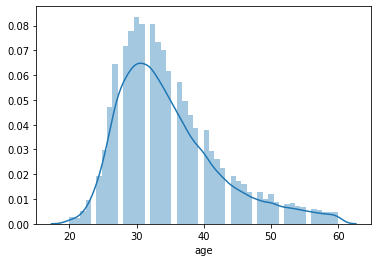

In [172]:
sns.distplot(train['age'])

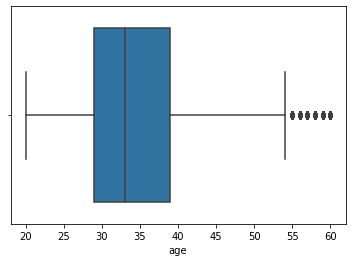

In [173]:
sns.boxplot(x='age', data=train)

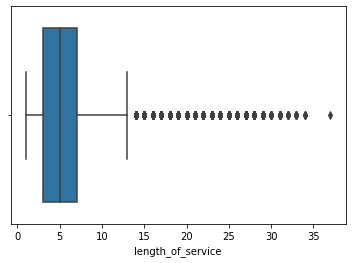

In [174]:
sns.boxplot(x='length_of_service', data=train)

(array([  870.,  7031., 13751., 12531.,  8300.,  5093.,  2861.,  1908.,
         1322.,  1141.]),
 array([20., 24., 28., 32., 36., 40., 44., 48., 52., 56., 60.]),
 <a list of 10 Patch objects>)

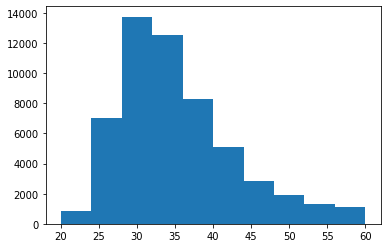

In [175]:
plt.hist(x='age', data=train)

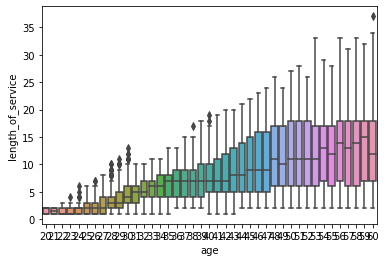

In [176]:
sns.boxplot(x='age', y='length_of_service', data=train)

In [177]:
train['age'] = pd.cut( x=train['age'], bins=[19, 29, 39, 49, 59, 69], labels=['20', '30', '40','50','60'])


In [178]:
train['age']

0        30
1        30
2        30
3        30
4        40
         ..
54803    40
54804    30
54805    20
54806    20
54807    20
Name: age, Length: 54808, dtype: category
Categories (5, object): [20 < 30 < 40 < 50 < 60]

In [179]:
train['age'].value_counts()

30    28030
20    14453
40     8952
50     3156
60      217
Name: age, dtype: int64

In [180]:
train['age'].isnull().sum()

0

In [181]:
train['age']

0        30
1        30
2        30
3        30
4        40
         ..
54803    40
54804    30
54805    20
54806    20
54807    20
Name: age, Length: 54808, dtype: category
Categories (5, object): [20 < 30 < 40 < 50 < 60]

In [182]:
test['age'] = pd.cut( x=test['age'], bins=[19, 29, 39, 49, 59, 69], labels=['20', '30', '40','50','60'])

In [183]:
test['age']

0        20
1        30
2        30
3        30
4        30
         ..
23485    20
23486    30
23487    20
23488    20
23489    40
Name: age, Length: 23490, dtype: category
Categories (5, object): [20 < 30 < 40 < 50 < 60]

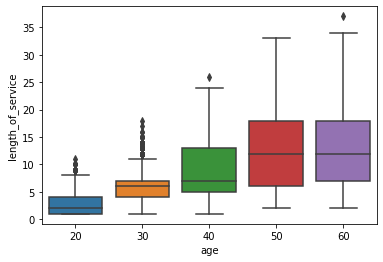

In [184]:
sns.boxplot(x='age', y='length_of_service', data=train)

(array([2.510e+04, 1.900e+04, 5.738e+03, 2.623e+03, 1.372e+03, 5.960e+02,
        2.270e+02, 9.600e+01, 5.100e+01, 5.000e+00]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ]),
 <a list of 10 Patch objects>)

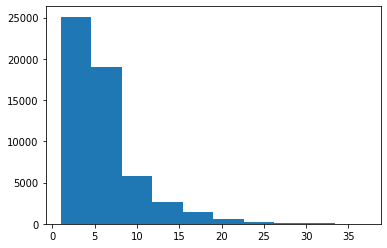

In [185]:
plt.hist(x='length_of_service', data=train)

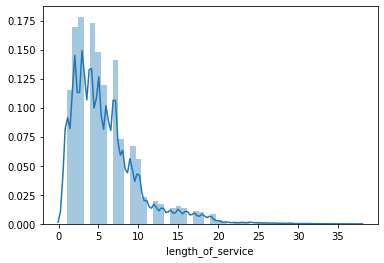

In [186]:

sns.distplot(train['length_of_service'])

In [187]:
train['length_of_service'] = pd.cut( x=train['length_of_service'], bins=[0,9,19,29,39], labels=['1','2','3','4'])
                                                                  

In [188]:
train['length_of_service'].value_counts()

1    46729
2     7433
3      590
4       56
Name: length_of_service, dtype: int64

In [189]:
train['education'].value_counts()

Bachelor's          38390
Master's & above    15579
Below Secondary       839
Name: education, dtype: int64

In [190]:
train['education']=train['education'].apply(lambda x : str(x).replace("Below Secondary", "0"))
train['education'] = train['education'].apply(lambda x : str(x).replace("Bachelor's", "1"))
train['education'] = train['education'].apply(lambda x : str(x).replace("Master's & above", "2"))

In [191]:
train['education']

0        2
1        1
2        1
3        1
4        1
        ..
54803    1
54804    2
54805    1
54806    1
54807    1
Name: education, Length: 54808, dtype: object

In [192]:
test['education']=test['education'].apply(lambda x : str(x).replace("Below Secondary", "0"))
test['education'] = test['education'].apply(lambda x : str(x).replace("Bachelor's", "1"))
test['education'] = test['education'].apply(lambda x : str(x).replace("Master's & above", "2"))

In [193]:
test['education']

0        1
1        1
2        1
3        1
4        1
        ..
23485    0
23486    1
23487    1
23488    1
23489    2
Name: education, Length: 23490, dtype: object

In [194]:
train1=train.drop([ 'employee_id', 'region' ], axis=1,inplace=False)

In [195]:
test1=test.drop([ 'employee_id', 'region' ], axis=1, inplace=False)

In [196]:
train1.isnull().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
Fresher                 0
dtype: int64

In [197]:
test1.isnull().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
Fresher                 0
dtype: int64

In [198]:
train1.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Fresher
0,0,2,0,1,1,30,5.0,1,1,0,49,0,1
1,1,1,1,0,1,30,5.0,1,0,0,60,0,1
2,0,1,1,1,1,30,3.0,1,0,0,50,0,1
3,0,1,1,0,2,30,1.0,2,0,0,50,0,1
4,3,1,1,0,1,40,3.0,1,0,0,73,0,1


In [199]:
x=train1.drop(['is_promoted'], axis=1, inplace=False)

In [200]:
x

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Fresher
0,0,2,0,1,1,30,5.0,1,1,0,49,1
1,1,1,1,0,1,30,5.0,1,0,0,60,1
2,0,1,1,1,1,30,3.0,1,0,0,50,1
3,0,1,1,0,2,30,1.0,2,0,0,50,1
4,3,1,1,0,1,40,3.0,1,0,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3,1,1,1,1,40,3.0,2,0,0,78,1
54804,1,2,0,0,1,30,2.0,1,0,0,56,1
54805,4,1,1,0,1,20,5.0,1,1,0,79,1
54806,0,1,1,1,1,20,1.0,1,0,0,45,1


In [201]:
y=train.is_promoted

In [202]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)

In [203]:
x=pd.DataFrame(robust_df)

In [204]:
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.333333,1.0,-1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.44,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0
2,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.40,0.0
3,-0.333333,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,-0.40,0.0
4,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0.666667,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.72,0.0
54804,0.000000,1.0,-1.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,-0.16,0.0
54805,1.000000,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.76,0.0
54806,-0.333333,0.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-0.60,0.0


In [205]:
x_train, x_valid, y_train, y_valid=train_test_split(x, y, test_size=0.2, random_state=100)

In [206]:
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (43846, 12)
Shape of x_valid:  (10962, 12)
Shape of y_train:  (43846,)
Shape of y_valid:  (10962,)


In [207]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11
6397,1.333333,0.0,0.0,1.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.08,0.0
52462,0.666667,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.64,0.0
36678,-0.333333,0.0,-1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,-0.44,0.0
6289,2.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.08,0.0
11887,-0.333333,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,-0.44,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16304,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.12,0.0
79,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.08,0.0
12119,-0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.28,0.0
14147,-0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.44,0.0


In [208]:
clf = lgb.LGBMClassifier(subsample_freq = 2,
                                             objective ="binary",
                                             importance_type = "gain",
                                             max_bin = 60,
                                             num_leaves = 300,
                                             boosting_type = 'gbdt',
                                             learning_rate=0.15,
                                             n_estimators=400,
                                             max_depth=5)
clf.fit(x_train, y_train)

LGBMClassifier(importance_type='gain', learning_rate=0.15, max_bin=60,
               max_depth=5, n_estimators=400, num_leaves=300,
               objective='binary', subsample_freq=2)

In [209]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

In [210]:
feature_importances

,importance
10,18663.956471
0,13121.259003
8,8470.495624
6,3169.143058
9,2012.846441
5,819.954850
3,711.239820
4,631.811134
1,505.554914
2,494.312537


In [211]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Fresher
0,8724,3,region_26,1,1,1,1,20,0.0,1,1,0,77,0
1,74430,6,region_4,1,0,0,1,30,3.0,5,0,0,51,1
2,72255,0,region_13,1,1,0,1,30,1.0,4,0,0,47,1
3,38562,2,region_2,1,0,0,3,30,2.0,9,0,0,65,1
4,64486,5,region_29,1,1,1,1,30,4.0,7,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,7,region_2,0,1,1,1,20,3.0,1,0,0,61,1
23486,25600,3,region_25,1,1,1,1,30,3.0,7,0,0,74,1
23487,45409,6,region_16,1,0,1,1,20,4.0,4,0,0,50,1
23488,1186,2,region_31,1,1,1,3,20,0.0,1,0,0,70,0


In [212]:
test1

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Fresher
0,3,1,1,1,1,20,0.0,1,1,0,77,0
1,6,1,0,0,1,30,3.0,5,0,0,51,1
2,0,1,1,0,1,30,1.0,4,0,0,47,1
3,2,1,0,0,3,30,2.0,9,0,0,65,1
4,5,1,1,1,1,30,4.0,7,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,7,0,1,1,1,20,3.0,1,0,0,61,1
23486,3,1,1,1,1,30,3.0,7,0,0,74,1
23487,6,1,0,1,1,20,4.0,4,0,0,50,1
23488,2,1,1,1,3,20,0.0,1,0,0,70,0


In [213]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(test1)

In [214]:
test2=pd.DataFrame(robust_df)

In [215]:
test2

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.666667,0.0,0.0,1.0,0.0,-1.0,-1.5,-1.00,1.0,0.0,0.68,-1.0
1,1.666667,0.0,-1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,-0.36,0.0
2,-0.333333,0.0,0.0,0.0,0.0,0.0,-1.0,-0.25,0.0,0.0,-0.52,0.0
3,0.333333,0.0,-1.0,0.0,2.0,0.0,-0.5,1.00,0.0,0.0,0.20,0.0
4,1.333333,0.0,0.0,1.0,0.0,0.0,0.5,0.50,0.0,0.0,0.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,2.000000,-1.0,0.0,1.0,0.0,-1.0,0.0,-1.00,0.0,0.0,0.04,0.0
23486,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.50,0.0,0.0,0.56,0.0
23487,1.666667,0.0,-1.0,1.0,0.0,-1.0,0.5,-0.25,0.0,0.0,-0.40,0.0
23488,0.333333,0.0,0.0,1.0,2.0,-1.0,-1.5,-1.00,0.0,0.0,0.40,-1.0


In [216]:
lgb_pred=clf.predict(test2)

In [217]:
x_test=pd.DataFrame(lgb_pred)

In [218]:
x_test

,0
0,0
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


In [219]:
print("Training Accuracy :", clf.score(x_train, y_train))

Training Accuracy : 0.9490489440313825


In [220]:
print("Validation Accuracy :", clf.score(x_valid, y_valid))

Validation Accuracy : 0.939792008757526


In [221]:
from sklearn.metrics import f1_score

In [222]:
y_pred=clf.predict(x_valid)

In [223]:
final_model_predictions=pd.DataFrame({'Actual':y_valid, 'predictions':y_pred})

In [224]:
final_model_predictions

,Actual,predictions
39633,0,0
30898,0,0
21726,0,0
13413,0,0
22223,0,0
...,...,...
7834,0,0
8488,1,0
44548,0,0
43335,1,1


In [225]:
count_misclassified = (y_valid != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_valid, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 660
Accuracy: 0.94


In [226]:
y_pred_prob = clf.predict_proba(x_valid)

In [227]:
y_pred_prob = clf.predict_proba(x_valid)[:, 1]

In [228]:
final_model_predictions['Predicted_prob'] = y_pred_prob

In [229]:
final_model_predictions.head()

,Actual,predictions,Predicted_prob
39633,0,0,0.000002
30898,0,0,0.000932
21726,0,0,0.304214
13413,0,0,0.000052
22223,0,0,0.112044


In [230]:
from sklearn.metrics import confusion_matrix as cm

In [231]:
cm=cm(final_model_predictions.Actual, final_model_predictions.predictions, [1,0])

C:\Users\Veena\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [232]:
cm

array([[ 357,  617],
       [  43, 9945]], dtype=int64)

In [233]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
import graphviz

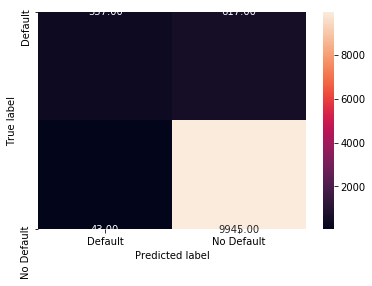

In [234]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [235]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( final_model_predictions.Actual, final_model_predictions.predictions  ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( final_model_predictions.Actual, final_model_predictions.predictions  ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score(final_model_predictions.Actual, final_model_predictions.predictions  ), 2 ) )

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.94
Precision :  0.89
Recall :  0.37
Sensitivity :  0.37
Specificity :  1.0


In [236]:
auc_score = metrics.roc_auc_score( final_model_predictions.Actual, final_model_predictions.Predicted_prob  )
round( float( auc_score ), 2 )


0.9

In [237]:
sklearn.metrics.f1_score(final_model_predictions.Actual, final_model_predictions.predictions, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

0.519650655021834

In [238]:
x_test

,0
0,0
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


In [239]:
test["employee_id"]

0         8724
1        74430
2        72255
3        38562
4        64486
         ...  
23485    53478
23486    25600
23487    45409
23488     1186
23489     5973
Name: employee_id, Length: 23490, dtype: int64

In [240]:
Result_Promoted = pd.DataFrame({ "employee_id":test["employee_id"], "is_promoted" : x_test[0]})

In [241]:
Result_Promoted

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0
